In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage

%matplotlib inline

In [20]:
from skimage import io  # skimage's I/O submodule.
from skimage import data

In [21]:
img = io.imread('bead_pack.tif')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dani/Dropbox/prog/python/DaniPython/lessons/BIDS/2019-tutorial-skimage/bead_pack.tif'

In [22]:
!wget https://github.com/dani-lbnl/imagexd19/blob/master/dip/data/bead_pack.tif?raw=true

--2019-10-01 20:50:08--  https://github.com/dani-lbnl/imagexd19/blob/master/dip/data/bead_pack.tif?raw=true
Resolving github.com... 192.30.255.113
Connecting to github.com|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dani-lbnl/imagexd19/raw/master/dip/data/bead_pack.tif [following]
--2019-10-01 20:50:09--  https://github.com/dani-lbnl/imagexd19/raw/master/dip/data/bead_pack.tif
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dani-lbnl/imagexd19/master/dip/data/bead_pack.tif [following]
--2019-10-01 20:50:09--  https://raw.githubusercontent.com/dani-lbnl/imagexd19/master/dip/data/bead_pack.tif
Resolving raw.githubusercontent.com... 151.101.196.133
Connecting to raw.githubusercontent.com|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8025493 (7.7M) [application/octet-stream]
Saving to: ‘

In [23]:
!mv bead_pack.tif?raw=true bead_pack.tif

In [24]:
!ls *.tif

bead_pack.tif


In [105]:
img = io.imread('bead_pack.tif')

## Basic image summary

In [26]:
print('* Shape: {}'.format(img.shape))
print('* Type: {}'.format(img.dtype))
print('* Range: {}, {}'.format(img.min(), img.max()))

* Shape: (200, 200, 200)
* Type: uint8
* Range: 29, 239


## Skim through

In [28]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

def slicer(z):
    plt.imshow(img[z,:,:], cmap='gray')

interact(slicer, z=widgets.IntSlider(min=0,max=60,step=1,value=5));

interactive(children=(IntSlider(value=5, description='z', max=60), Output()), _dom_classes=('widget-interact',…

## [skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html) - evaluating or changing the exposure of an image<a id='exposure'></a>

This module contains a number of functions for adjusting image contrast. We will use `exposure.adjust_gamma`, which performs gamma correction in the input image.


[Gamma correction](https://en.wikipedia.org/wiki/Gamma_correction), also known as Power Law Transform, brightens or darkens an image. The function $O = I^\gamma$ is applied to each pixel in the image. A `gamma < 1` will brighten an image, while a `gamma > 1` will darken an image.

In [79]:
from skimage import exposure
ex = exposure.equalize_hist(img)
def slicer(z):
    plt.imshow(ex[z,:,:], cmap='gray')

interact(slicer, z=widgets.IntSlider(min=0,max=60,step=1,value=5));

interactive(children=(IntSlider(value=5, description='z', max=60), Output()), _dom_classes=('widget-interact',…

## Edge detection

[Edge detection](https://en.wikipedia.org/wiki/Edge_detection) highlights regions in the image where a sharp change in contrast occurs. The intensity of an edge corresponds to the steepness of the transition from one intensity to another. A gradual shift from bright to dark intensity results in a dim edge. An abrupt shift results in a bright edge.

## [skimage.filters](https://scikit-image.org/docs/stable/api/skimage.filters.html) - apply filters to an image<a id='filters'></a>

Filtering applies whole-image modifications such as sharpening or blurring. In addition to edge detection, `skimage.filters` provides functions for filtering and thresholding images.

Notable functions include (links to relevant gallery examples):

* [Thresholding](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html):
  * `filters.threshold_*` (multiple different functions with this prefix)
  * `filters.try_all_threshold` to compare various methods
* [Edge finding/enhancement](https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html):
  * `filters.sobel` - not adapted for 3D images. It can be applied planewise to approximate a 3D result.
  * `filters.prewitt`
  * `filters.scharr`
  * `filters.roberts`
  * `filters.laplace`
  * `filters.hessian`
* [Ridge filters](https://scikit-image.org/docs/stable/auto_examples/edges/plot_ridge_filter.html):
  * `filters.meijering`
  * `filters.sato`
  * `filters.frangi`
* Inverse filtering (see also [skimage.restoration](#restoration)):
  * `filters.weiner`
  * `filters.inverse`
* [Directional](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html): `filters.gabor`
* Blurring/denoising
  * `filters.gaussian`
  * `filters.median`
* [Sharpening](https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html): `filters.unsharp_mask`
* Define your own filter: `LPIFilter2D`
  
The sub-submodule `skimage.filters.rank` contains rank filters. These filters are nonlinear and operate on the local histogram.

In [36]:
from skimage import filters
img2 = filters.laplace(img)
def slicer(z):
    plt.imshow(img2[z,:,:], cmap='gray')

interact(slicer, z=widgets.IntSlider(min=0,max=60,step=1,value=5));

interactive(children=(IntSlider(value=5, description='z', max=60), Output()), _dom_classes=('widget-interact',…

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1152x720 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1485d7320>,
       dtype=object))

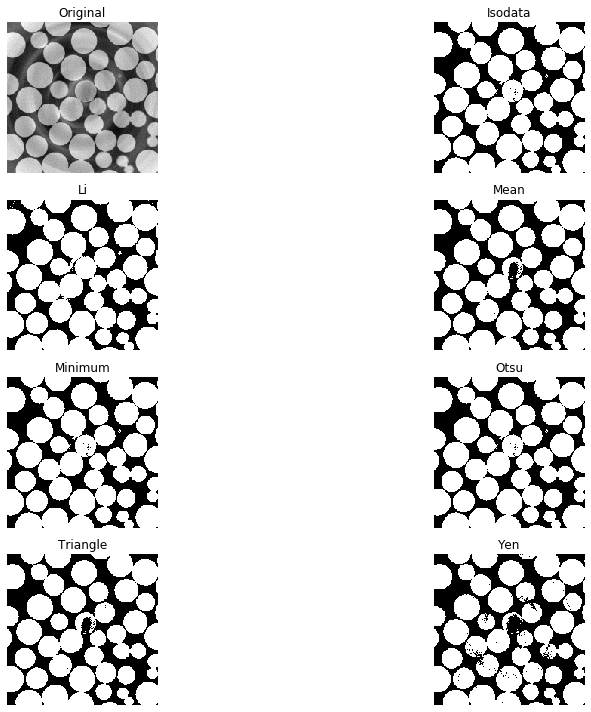

In [106]:
from skimage import filters
n=27
aslice = img[n,:,:]
filters.try_all_threshold(aslice,figsize=(16,10))

In [109]:
from skimage import filters
img3 = filters.gaussian(img)
t=filters.threshold_isodata(img3)
img3 = img3>t

def slicer(z):
    plt.imshow(img3[z,:,:], cmap='gray')

interact(slicer, z=widgets.IntSlider(min=0,max=60,step=1,value=5));

interactive(children=(IntSlider(value=5, description='z', max=60), Output()), _dom_classes=('widget-interact',…

## <a id='morphology'></a>[skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html) - binary and grayscale morphology

Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image, such as boundaries, skeletons, etc. In any given technique, we probe an image with a small shape or template called a structuring element, which defines the region of interest or neighborhood around a pixel.

[Mathematical morphology](https://en.wikipedia.org/wiki/Mathematical_morphology) operations and structuring elements are defined in `skimage.morphology`. Structuring elements are shapes which define areas over which an operation is applied. The response to the filter indicates how well the neighborhood corresponds to the structuring element's shape.

There are a number of two and three dimensional structuring elements defined in `skimage.morphology`. Not all 2D structuring element have a 3D counterpart. The simplest and most commonly used structuring elements are the `disk`/`ball` and `square`/`cube`.

In [82]:
from skimage import morphology  # skimage's morphological submodules.

In [85]:
ball = morphology.ball(radius=3)

In [110]:
img2te=morphology.binary_erosion(img3,selem=ball)
img2to=morphology.binary_opening(img3,selem=ball)

In [111]:
#show two 2D images side by side for quick comparison
def imshowcmp(before,after,lut):
    f, ax = plt.subplots(1, 2, figsize=(20, 20))
    ax[0].imshow(before,cmap=lut)
    ax[1].imshow(after,cmap=lut)

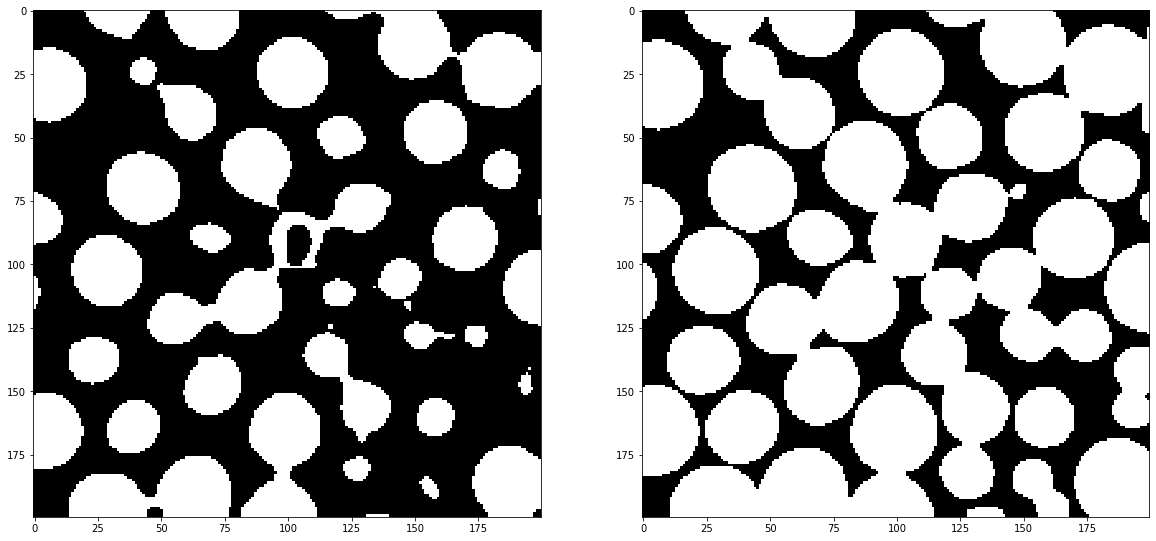

In [113]:
imshowcmp(img2te[n,:,:],img2to[n,:,:],'gray')

## How about some deep learning?

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [15]:
net = InceptionV3()

In [16]:
from skimage import transform

def inception_predict(image):
    # Rescale image to 299x299, as required by InceptionV3
    image_prep = transform.resize(image, (299, 299, 3), mode='reflect')
    
    # Scale image values to [-1, 1], as required by InceptionV3
    image_prep = (img_as_float(image_prep) - 0.5) * 2
    
    predictions = decode_predictions(
        net.predict(image_prep[None, ...])
    )
    
    plt.imshow(image, cmap='gray')
    
    for pred in predictions[0]:
        (n, klass, prob) = pred
        print(f'{klass:>15} ({prob:.3f})')



   Egyptian_cat (0.904)
          tabby (0.054)
      tiger_cat (0.035)
           lynx (0.000)
    plastic_bag (0.000)


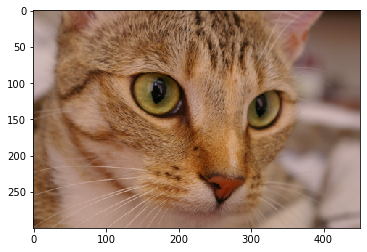

In [17]:
from skimage import data, img_as_float
inception_predict(data.chelsea())

         tripod (0.937)
         crutch (0.002)
     binoculars (0.002)
  reflex_camera (0.001)
       backpack (0.000)


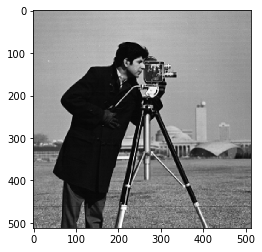

In [18]:
inception_predict(data.camera())